In [18]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
Data = pd.read_csv("Heart Attack.csv")
print(Data)

      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin     class  
0        0.012  negative  
1        1.060  positive  
2        0.003  negative  
3  

In [3]:
Data.columns = ["Idade","Gênero","Impulso","Pressão Mâxima","Pressão Mínima","Glicose","CK-MB","Troponina","Infarto"]
print(Data)

      Idade  Gênero  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  CK-MB  \
0        64       1       66             160              83    160.0   1.80   
1        21       1       94              98              46    296.0   6.75   
2        55       1       64             160              77    270.0   1.99   
3        64       1       70             120              55    270.0  13.87   
4        55       1       64             112              65    300.0   1.08   
...     ...     ...      ...             ...             ...      ...    ...   
1314     44       1       94             122              67    204.0   1.63   
1315     66       1       84             125              55    149.0   1.33   
1316     45       1       85             168             104     96.0   1.24   
1317     54       1       58             117              68    443.0   5.80   
1318     51       1       94             157              79    134.0  50.89   

      Troponina   Infarto  
0         0

In [4]:
Criterio_1 = Data["Infarto"] == "negative"
Criterio_2 = Data["Infarto"] == "positive"
Target = Data["Infarto"] 
Negativos= Target.loc[Criterio_1]
Positivos= Target.loc[Criterio_2]
Linhas_1=Negativos.index
Linhas_2=Positivos.index
Data.loc[Linhas_1,"Infarto"] = 0
Data.loc[Linhas_2,"Infarto"] = 1
print(Data)

      Idade  Gênero  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  CK-MB  \
0        64       1       66             160              83    160.0   1.80   
1        21       1       94              98              46    296.0   6.75   
2        55       1       64             160              77    270.0   1.99   
3        64       1       70             120              55    270.0  13.87   
4        55       1       64             112              65    300.0   1.08   
...     ...     ...      ...             ...             ...      ...    ...   
1314     44       1       94             122              67    204.0   1.63   
1315     66       1       84             125              55    149.0   1.33   
1316     45       1       85             168             104     96.0   1.24   
1317     54       1       58             117              68    443.0   5.80   
1318     51       1       94             157              79    134.0  50.89   

      Troponina Infarto  
0         0.0

In [5]:
Data.insert(1,'Homem',0)
Data.insert(1,'Mulher',0)
Criterio_3 = Data["Gênero"] == 0
Criterio_4 = Data["Gênero"] == 1
Target = Data["Infarto"] 
Mulher= Target.loc[Criterio_3]
Homem= Target.loc[Criterio_4]
Linhas_3=Mulher.index
Linhas_4=Homem.index
Data.loc[Linhas_3,"Mulher"] = 1
Data.loc[Linhas_4,"Homem"] = 1
Data = Data.drop("Gênero",axis=1)
print(Data)

      Idade  Mulher  Homem  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  \
0        64       0      1       66             160              83    160.0   
1        21       0      1       94              98              46    296.0   
2        55       0      1       64             160              77    270.0   
3        64       0      1       70             120              55    270.0   
4        55       0      1       64             112              65    300.0   
...     ...     ...    ...      ...             ...             ...      ...   
1314     44       0      1       94             122              67    204.0   
1315     66       0      1       84             125              55    149.0   
1316     45       0      1       85             168             104     96.0   
1317     54       0      1       58             117              68    443.0   
1318     51       0      1       94             157              79    134.0   

      CK-MB  Troponina Infarto  
0     

In [6]:
Data = Data.astype({"Homem": bool,"Mulher": bool, "Infarto": bool})
Data.describe()

,Idade,Impulso,Pressão Mâxima,Pressão Mínima,Glicose,CK-MB,Troponina
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [7]:
Data.describe(include=[bool])

,Mulher,Homem,Infarto
count,1319,1319,1319
unique,2,2,2
top,False,True,True
freq,870,870,810


A partir de todos esses dados e analizes seria possivel treinar uma IA para que ela pudesse a partir dos dados dizer se a pessoa teve ou não um infarto o que poderia ser util em hospitais por exemplo pra que apois os exame entrarem no sistema poder alertar o médico da urgencia para que ele possa analizar o caso.

In [8]:
Data = Data.astype({"Homem": float,"Mulher": float, "Infarto":float})
Indices_Treino, Indices_Teste = train_test_split(Data.index, test_size=0.2)
Data_Treino = Data.loc[Indices_Treino]
Data_Teste = Data.loc[Indices_Teste]

In [26]:
accuracy_score(Yts, Y_Previsto, normalize=True)

0.9810606060606061

In [9]:
Xtr=Data_Treino.drop("Infarto", axis=1)
Ytr=Data_Treino["Infarto"]
print(Xtr,Ytr)
Xts=Data_Teste.drop("Infarto", axis=1)
Yts=Data_Teste["Infarto"]
print(Xts,Yts)

      Idade  Mulher  Homem  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  \
76       47     1.0    0.0       64             101              68    147.0   
227      70     1.0    0.0       79             150              85    146.0   
258      62     0.0    1.0       71             140              71    125.0   
297      91     0.0    1.0       80              65              53     94.0   
1010     35     0.0    1.0       60             109              65    222.0   
...     ...     ...    ...      ...             ...             ...      ...   
1127     60     1.0    0.0       89             111              57    194.0   
863      60     0.0    1.0       82             135              80    100.0   
1313     86     1.0    0.0       40             179              68    147.0   
717      70     1.0    0.0     1111             141              95    138.0   
1076     65     1.0    0.0       78             115              65    116.0   

      CK-MB  Troponina  
76     7.65   

In [33]:
modelo_baseline = DummyClassifier()

Base = modelo_baseline.fit(Xtr, Ytr)

<AxesSubplot: >

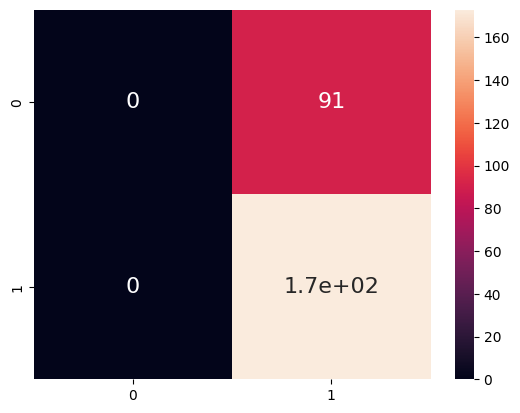

In [34]:
Y_Previsto_B = Base.predict(Xts)

Matriz_Conf_B = confusion_matrix(Yts,Y_Previsto_B)

Data_conf_B = pd.DataFrame(Matriz_Conf_B)

sns.heatmap(Data_conf_B, annot=True, annot_kws={"size": 16})

In [35]:
accuracy_score(Yts, Y_Previsto_B, normalize=True)

0.6553030303030303

In [10]:
N_Divisoes = 10
N_Iter = 100

Espaco_de_Busca = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": [None, 0.33, "sqrt", "log2"],
}

Tipo = RandomForestClassifier()

Buscador = RandomizedSearchCV(
    Tipo,
    Espaco_de_Busca,
    n_iter= N_Iter,
    cv= N_Divisoes,
    scoring="neg_root_mean_squared_error",
    refit=True,# reajusta o melhor modelo com todos os dados de treino
    error_score='raise',
    n_jobs=4,
   )

Buscador.fit(Xtr, Ytr)

Resultados = pd.DataFrame(Buscador.cv_results_)
Resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131583,0.009088,0.012210,0.004180,4,1,0.33,2,"{'min_samples_split': 4, 'min_samples_leaf': 1...",-0.097129,...,-0.168232,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.00000,-0.087281,0.061071,75
1,0.151012,0.018761,0.010324,0.003627,3,4,sqrt,3,"{'min_samples_split': 3, 'min_samples_leaf': 4...",-0.097129,...,-0.137361,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.00000,-0.080171,0.055077,18
2,0.194944,0.008544,0.008322,0.003646,2,1,None,10,"{'min_samples_split': 2, 'min_samples_leaf': 1...",-0.000000,...,-0.097129,-0.137361,-0.0,-0.169031,-0.00000,-0.09759,-0.09759,-0.059870,0.063306,8
3,0.158505,0.013374,0.011179,0.004399,3,1,sqrt,10,"{'min_samples_split': 3, 'min_samples_leaf': 1...",-0.097129,...,-0.137361,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.09759,-0.093953,0.050294,93
4,0.161527,0.012322,0.010794,0.003937,3,4,sqrt,5,"{'min_samples_split': 3, 'min_samples_leaf': 4...",-0.097129,...,-0.137361,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.00000,-0.080171,0.055077,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.503802,0.030036,0.026435,0.004887,4,4,sqrt,10,"{'min_samples_split': 4, 'min_samples_leaf': 4...",-0.097129,...,-0.137361,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.00000,-0.080171,0.055077,18
96,0.392393,0.022010,0.026438,0.006043,3,1,0.33,2,"{'min_samples_split': 3, 'min_samples_leaf': 1...",-0.097129,...,-0.168232,-0.137361,-0.0,-0.138013,-0.09759,-0.09759,-0.00000,-0.100127,0.056727,97
97,0.448588,0.038696,0.031649,0.006482,3,3,sqrt,3,"{'min_samples_split': 3, 'min_samples_leaf': 3...",-0.097129,...,-0.137361,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.00000,-0.084194,0.057582,56
98,0.497464,0.031399,0.030491,0.007340,4,1,sqrt,7,"{'min_samples_split': 4, 'min_samples_leaf': 1...",-0.097129,...,-0.137361,-0.137361,-0.0,-0.138013,-0.00000,-0.09759,-0.09759,-0.089930,0.048228,77


In [11]:
Hiperparametros = Buscador.best_params_
print("A melhor métrica para o dados de treino foi: ", abs(Buscador.best_score_))
print("O Hiperparametros correspondentes são ", Hiperparametros)

A melhor métrica para o dados de treino foi:  0.0567682276642593
O Hiperparametros correspondentes são  {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


In [12]:
TESTE = RandomForestClassifier(min_samples_split = Hiperparametros.get("min_samples_split"), min_samples_leaf = Hiperparametros.get("min_samples_leaf"), max_features =Hiperparametros.get("max_features"), max_depth = Hiperparametros.get("max_depth"))
TESTE.fit(Xtr,Ytr)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=4)

<AxesSubplot: >

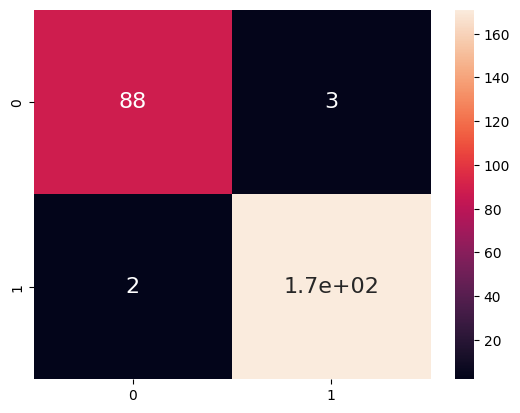

In [36]:
Y_Previsto = TESTE.predict(Xts)

Matriz_Conf = confusion_matrix(Yts,Y_Previsto)

Data_conf = pd.DataFrame(Matriz_Conf)

sns.heatmap(Data_conf, annot=True, annot_kws={"size": 16})

In [37]:
accuracy_score(Yts, Y_Previsto, normalize=True)

0.9810606060606061

## Referencias:

Notebook de Módulo Pandas

1.Banco de dados da onde o Dataset foi tirado: https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset

2.Explicação sobre a funão loc do pandas: https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87

3.Explicação do que é CK_MB: https://ibapcursos.com.br/creatina-quinase-ckmb-alta-no-sangue-o-que-significa-essa-alteracao-no-exame/   e  https://labtestsonline.org.br/tests/ck-mb

4.Explicação do que é troponina: https://www.tuasaude.com/exame-de-troponina/

5.Explicação de como modificar o tipo de uma coluna: https://jobu.com.br/2022/11/29/3-metodos-de-como-alterar-tipo-da-coluna-com-pandas/

6.Ajudou na explicação das colunas: https://cardiopapers.com.br/por-que-nao-existe-aumento-falso-positivo-de-troponina/

7.Documentação da biblioteca Sckit learn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier